## Implementación de Regresión Lineal Simple sin el uso de un framework

En este proyecto se planea realizar múltiples modelos que predigan la cantidad de ventas en millones según cuántos millones se invierten en marketing tipo TV, Redes Sociales y Radio.

El objetivo es comparar cuántas ventas se tendrían si se invierte la misma cantidad en TV, Redes Sociales y Radio.


---

**¿Cuál escenario es el que más nos conviene a la hora de invertir en Marketing?**

---

*Los datos son de: https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data

## 1. Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

## 2. Definir funciones

In [2]:
# Definimos función que actualiza los parámetros w y b durante cada epoch
def update_w_and_b(X, y, w, b, alpha):
  '''Update parameters w and b during 1 epoch'''
  # Inicializamos las derivadas parciales
  dl_dw = 0.0
  dl_db = 0.0
  N = len(X)

  # Calculamos las derivadas
  for i in range(N):
    dl_dw += -2*X[i]*(y[i] - (w*X[i] + b))
    dl_db += -2*(y[i] - (w*X[i] + b))

  # Actualizamos valores w y b
  # update w and b
  w = w - (1/float(N))*dl_dw*alpha
  b = b - (1/float(N))*dl_db*alpha
  return w, b

# Definimos función para entrenar y regresar el progreso (valor de loss)
def train(X, y, w, b, alpha, epochs):
  '''Loops over multiple epochs and prints progress'''
  print('Training progress:')

  #Inicializamos lista y variable
  avg_loss_list = []
  loss_last_epoch = 9999999

  # Entre cada epoch, actualiza los valores de w y b con ayuda de la función update_w_and_b() y calcula el loss
  for e in range(epochs):
    w, b = update_w_and_b(X, y, w, b, alpha)
    avg_loss_ = avg_loss(X, y, w, b)

  # log the progress
  # Imprime el progreso cada 400 epochs
    #if e % 10 == 0:
      # print("epoch: {} | loss: {}".format(e, avg_loss_))
    print("Epoch {} | Loss: {} | w:{}, b:{}".format(e, avg_loss_, round(w, 4), round(b, 4)))

    avg_loss_list.append(avg_loss_) #añade el loss a una lista
    loss_step = abs(loss_last_epoch - avg_loss_) #* Calcula la diferencia entre el ultimo loss y el actual
    loss_last_epoch = avg_loss_ #* actualiza el valor del ultimo loss al actual para la siguiente epoch

    # Para de entrenar si la diferencia del error en el epoch anterior contra el epoch actual es menor a 0.001
    if loss_step < 0.0001: #*
      print('\nStopping training on epoch {}/{}, as (last epoch loss - current epoch loss) is less than 0.001 [{}]'.format(e, epochs, loss_step)) #*
      break #*

  return w, b # Regresa los últimos valores de w y b

# Definimos función para entrenar y regresar el progreso (valor de loss) PARA MODELO DE REDES
def train_Redes(X, y, w, b, alpha, epochs):
  '''Loops over multiple epochs and prints progress'''
  print('Training progress:')

  #Inicializamos lista y variable
  avg_loss_list = []
  loss_last_epoch = 9999999

  # Entre cada epoch, actualiza los valores de w y b con ayuda de la función update_w_and_b() y calcula el loss
  for e in range(epochs):
    w, b = update_w_and_b(X, y, w, b, alpha)
    avg_loss_ = avg_loss(X, y, w, b)

  # log the progress
  # Imprime el progreso cada 400 epochs
    if e % 4000 == 0:
      # print("epoch: {} | loss: {}".format(e, avg_loss_))
      print("Epoch {} | Loss: {} | w:{}, b:{}".format(e, avg_loss_, round(w, 4), round(b, 4)))

    avg_loss_list.append(avg_loss_) #añade el loss a una lista
    loss_step = abs(loss_last_epoch - avg_loss_) #* Calcula la diferencia entre el ultimo loss y el actual
    loss_last_epoch = avg_loss_ #* actualiza el valor del ultimo loss al actual para la siguiente epoch

    # Para de entrenar si la diferencia del error en el epoch anterior contra el epoch actual es menor a 0.001
    if loss_step < 0.0001: #*
      print('\nStopping training on epoch {}/{}, as (last epoch loss - current epoch loss) is less than 0.001 [{}]'.format(e, epochs, loss_step)) #*
      break #*

  return w, b # Regresa los últimos valores de w y b

# Definimos función para graficar determinados epochs y su progreso
def train_and_plot(X, y, w, b, alpha, epochs, x_max_plot):
  '''Loops over multiple epochs and plot graphs showing progress'''
  for e in range(epochs):
    w, b = update_w_and_b(X, y, w, b, alpha)
  # plot visuals for last epoch
    if e == epochs-1:
      avg_loss_ = avg_loss(X, y, w, b)
      x_list = np.array(range(0,x_max_plot)) # Set x range
      y_list = (x_list * w) + b # Set function for the model based on w & b
      plt.scatter(x=X, y=y)
      plt.plot(y_list, c='r')
      plt.title("Epoch {} | Loss: {} | w:{}, b:{}".format(e, round(avg_loss_,2), round(w, 4), round(b, 4)))
      plt.show()
  return w, b

# Función para calcular el MSE: error promedio de las penalizaciones obtenidas al aplicar el modelo en la data de entrenamiento
def avg_loss(X, y, w, b):
  '''Calculates the MSE'''
  N = len(X)
  total_error = 0.0
  for i in range(N):
    total_error += (y[i] - (w*X[i] + b))**2
  return total_error / float(N)

# Definimos función para predecir
def predict(x, w, b):
  return w*x + b

## 3. Cargar y separar datasets


In [3]:
# Cargamos el dataset (el dataset debe estar en la misma carpeta que el programa)
df_Marketing = pd.read_csv("marketing_sales.csv",encoding='latin-1')
df_Marketing = df_Marketing.dropna()

# Separar features en datasets para cada modelo (deben estar en formato de array)
  # TV
X_TV = df_Marketing[['TV']].values.flatten()
  # Redes Sociales
X_Redes = df_Marketing[['Social Media']].values.flatten()
  # Radio
X_Radio = df_Marketing[['Radio']].values.flatten()

# Separar label para los modelos
y_Sales = df_Marketing[['Sales']].values.flatten()


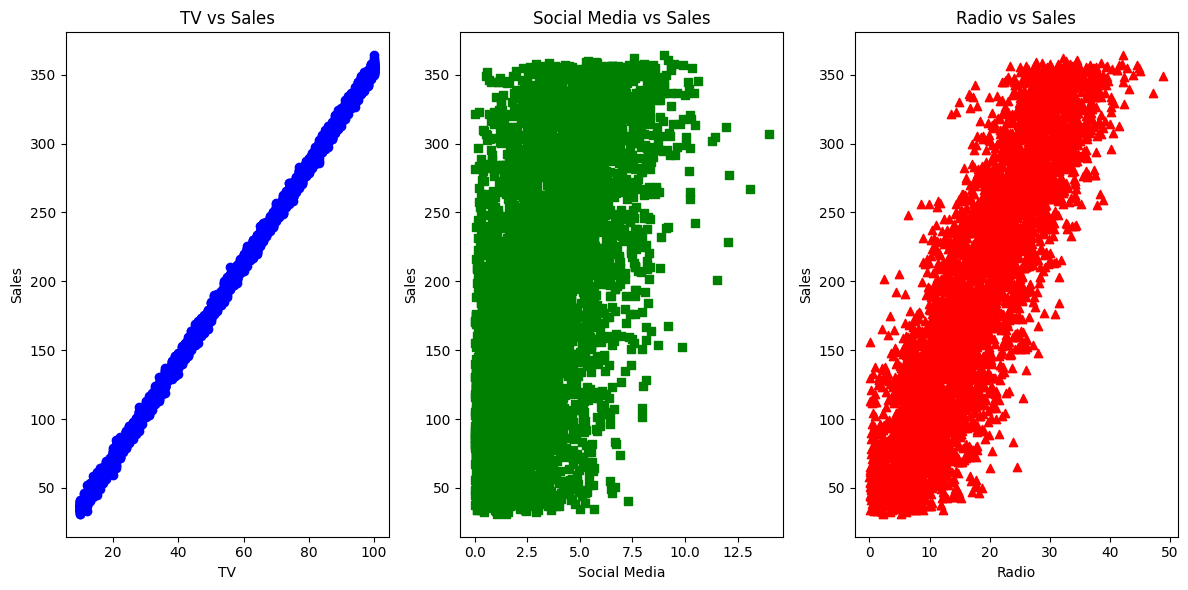

In [4]:
# Visualizar data
# Crear scatter plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_TV, y_Sales, c='b', marker='o')
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(1, 3, 2)
plt.scatter(X_Redes, y_Sales, c='g', marker='s')
plt.title('Social Media vs Sales')
plt.xlabel('Social Media')
plt.ylabel('Sales')

plt.subplot(1, 3, 3)
plt.scatter(X_Radio, y_Sales, c='r', marker='^')
plt.title('Radio vs Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

## 4. Entrenar modelos


Training progress:
Epoch 0 | Loss: 3563.6776920609095 | w:2.5658, b:0.0385
Epoch 1 | Loss: 285.45240330620607 | w:3.2817, b:0.0492
Epoch 2 | Loss: 30.245576150060923 | w:3.4814, b:0.0522
Epoch 3 | Loss: 10.377958684409972 | w:3.5372, b:0.053
Epoch 4 | Loss: 8.831282463873512 | w:3.5527, b:0.0533
Epoch 5 | Loss: 8.710874686049298 | w:3.557, b:0.0533
Epoch 6 | Loss: 8.701500596071238 | w:3.5583, b:0.0533
Epoch 7 | Loss: 8.700770376708821 | w:3.5586, b:0.0533
Epoch 8 | Loss: 8.70071307476627 | w:3.5587, b:0.0533

Stopping training on epoch 8/12000, as (last epoch loss - current epoch loss) is less than 0.001 [5.730194255093579e-05]


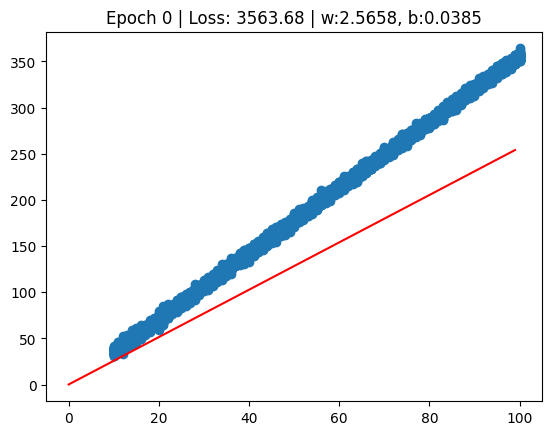

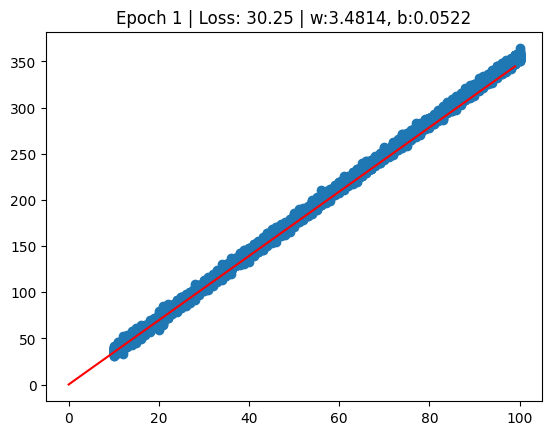

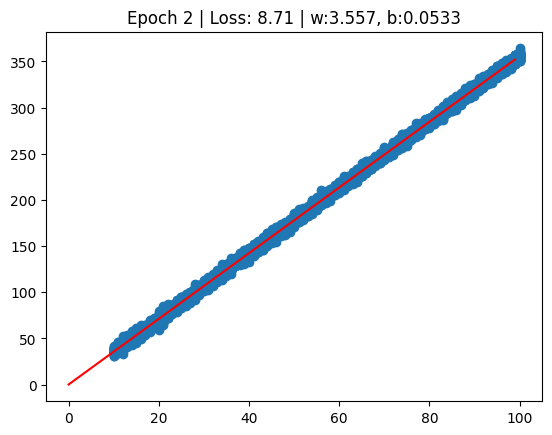

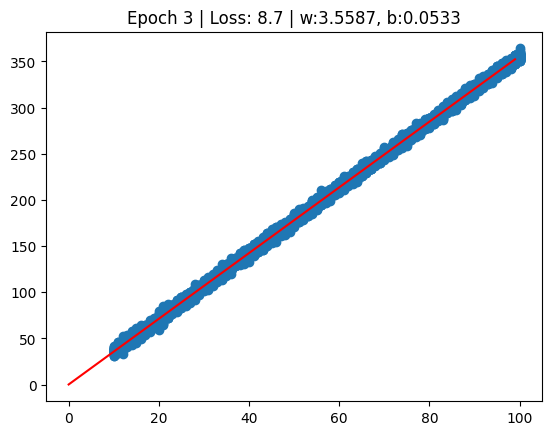

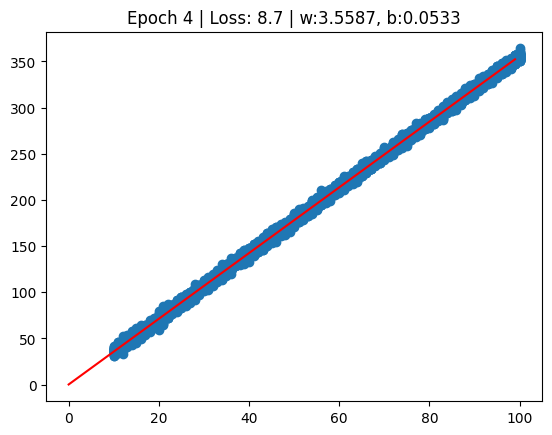

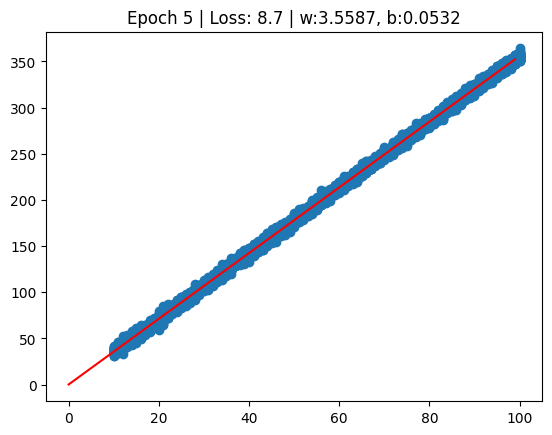

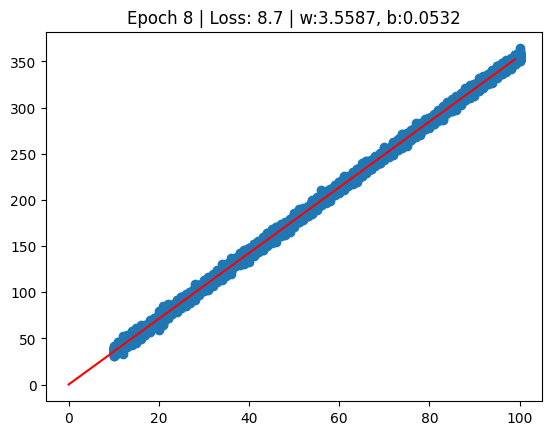

In [5]:
# Definimos learning rate y cantidad de epochs para todos los modelos
alpha = 0.0001
epochs = 12000

# Inicializamos variables para el modelo TV
w = 0.0
b = 0.0

# Train Model: Entrenamos el modelo TV
w_TV, b_TV = train(X_TV, y_Sales, w, b, alpha, epochs)

# Visualización del progreso del modelo TV
epoch_plots = [1, 2, 3, 4, 5, 6, 9]
for epoch_plt in epoch_plots:
  w, b = train_and_plot(X_TV, y_Sales, w, b, alpha, epoch_plt, 100)

Training progress:
Epoch 0 | Loss: 45435.50088056802 | w:0.1496, b:0.0385
Epoch 4000 | Loss: 8525.18653836564 | w:40.5031, b:32.4808
Epoch 8000 | Loss: 7669.714068739164 | w:36.667, b:50.534


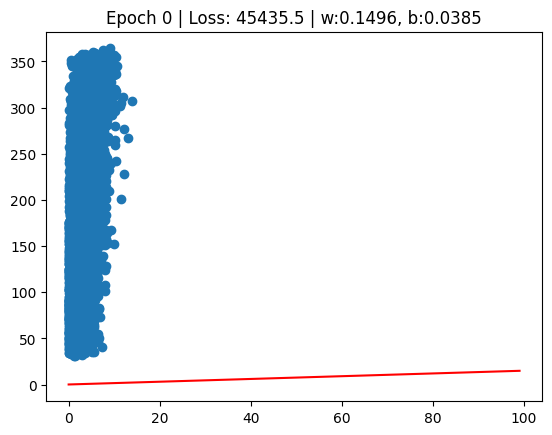

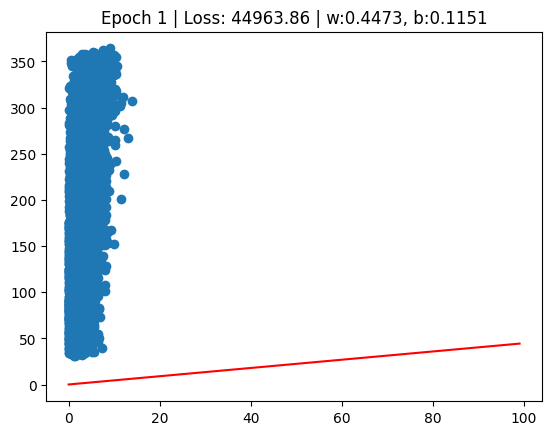

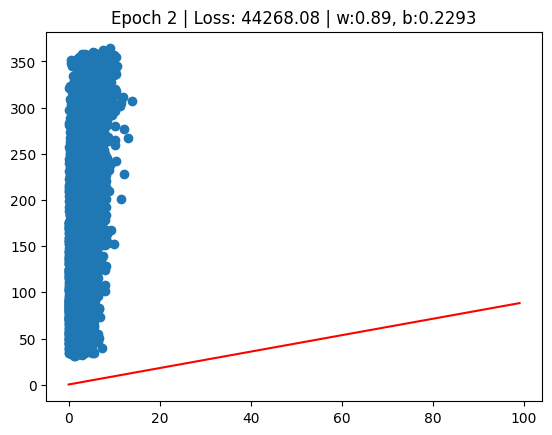

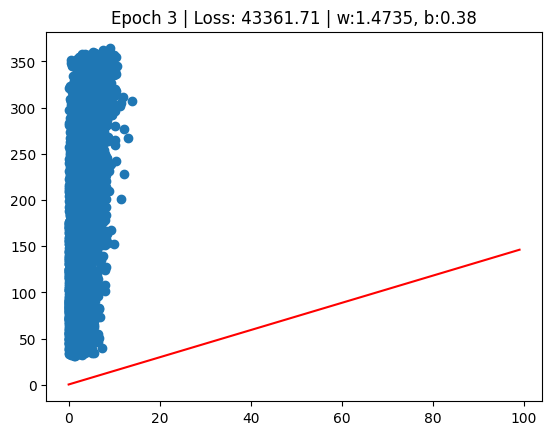

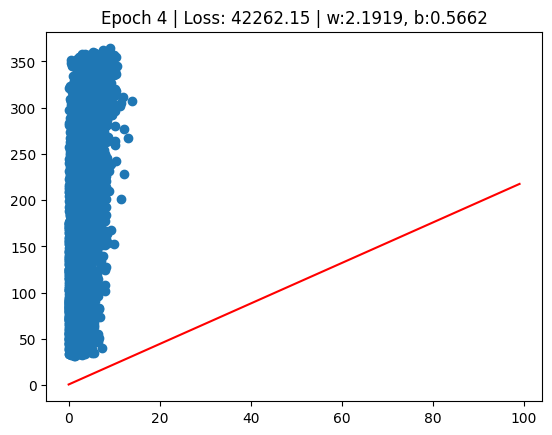

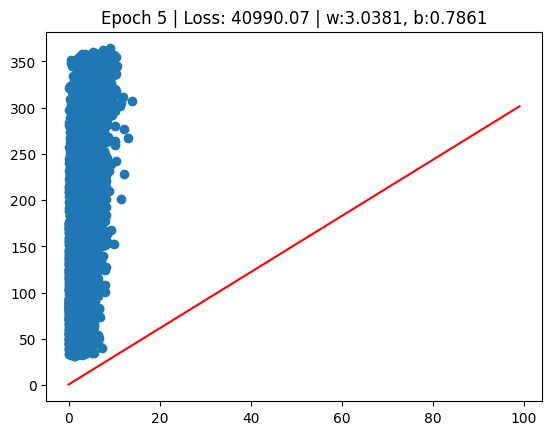

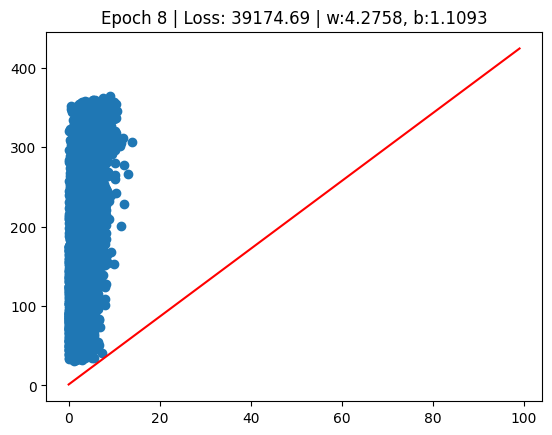

In [6]:
# Inicializamos variables para el modelo Redes Sociales
w = 0.0
b = 0.0

# Train Model: Entrenamos el modelo Redes Sociales
w_Redes, b_Redes = train_Redes(X_Redes, y_Sales, w, b, alpha, epochs)

# Visualización del progreso del modelo Redes Sociales
epoch_plots = [1, 2, 3, 4, 5, 6, 9]
for epoch_plt in epoch_plots:
  w, b = train_and_plot(X_Redes, y_Sales, w, b, alpha, epoch_plt, 100)

Training progress:
Epoch 0 | Loss: 38661.125414568225 | w:0.8549, b:0.0385
Epoch 4000 | Loss: 2373.591531818609 | w:9.8073, b:6.9221
Epoch 8000 | Loss: 2299.305767028264 | w:9.5737, b:12.3612


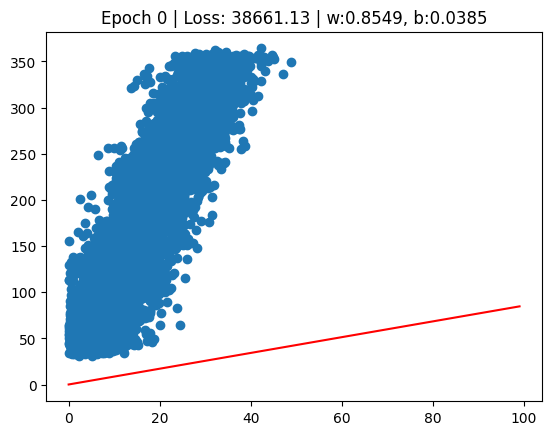

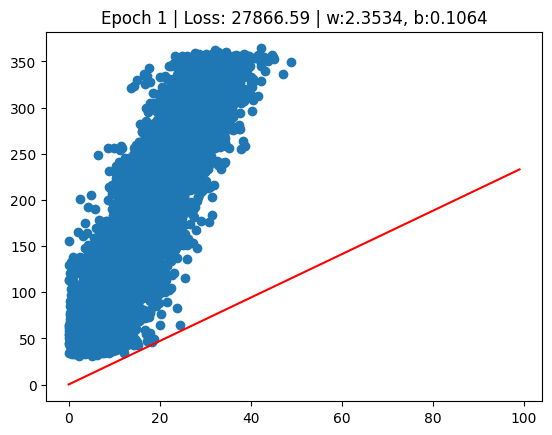

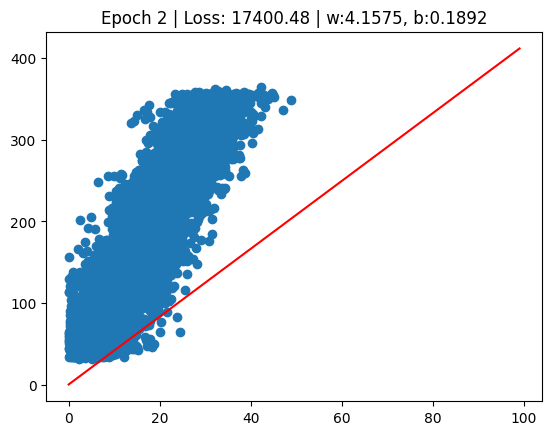

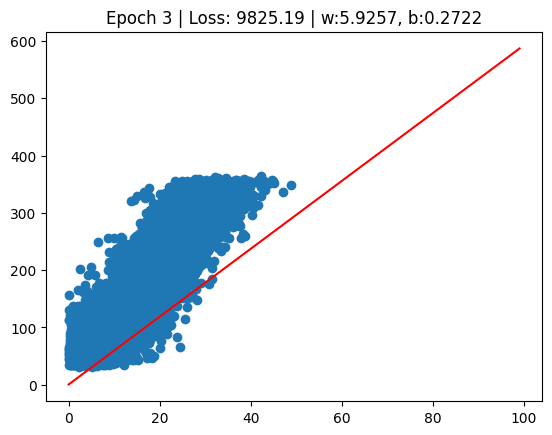

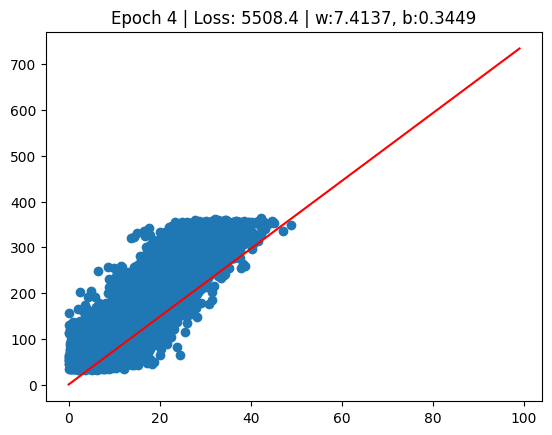

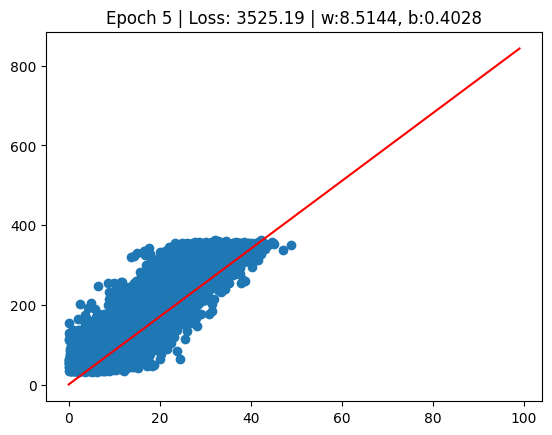

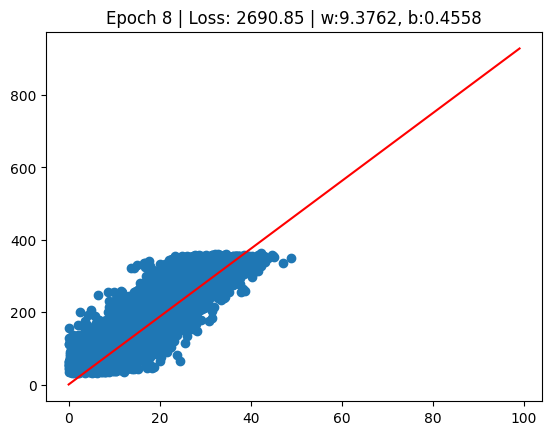

In [7]:
# Inicializamos variables para el modelo Radio
w = 0.0
b = 0.0

# Train Model: Entrenamos el modelo Radio
w_Radio, b_Radio = train_Redes(X_Radio, y_Sales, w, b, alpha, epochs)

# Visualización del progreso del modelo Radio
epoch_plots = [1, 2, 3, 4, 5, 6, 9]
for epoch_plt in epoch_plots:
  w, b = train_and_plot(X_Radio, y_Sales, w, b, alpha, epoch_plt, 100)

## 5. Realizar predicciones


In [14]:
# Ya que entrenamos los modelos, predecimos
  # Definimos una lista con la cantidad de millones a invertir en cada tipo de marketing
x_new_list = [23, 10, 5, 6, 80, 3, 1, 100, 0, 18]

# Inicializar las listas para las predicciones de los modelos
predictions_TV = []
predictions_Radio = []
predictions_Redes = []
errors_TV = []
errors_Radio = []
errors_Redes = []

# Calcular las predicciones y errores para cada valor de x_new
for x_new in x_new_list:
    prediction_TV = predict(x_new, w_TV, b_TV)
    prediction_Radio = predict(x_new, w_Radio, b_Radio)
    prediction_Redes = predict(x_new, w_Redes, b_Redes)

    loss_TV = 8.7
    loss_Radio = 39174.69
    loss_Redes = 2690.85

    predictions_TV.append((prediction_TV, loss_TV))
    predictions_Radio.append((prediction_Radio, loss_Radio))
    predictions_Redes.append((prediction_Redes, loss_Redes))

# Crear un DataFrame con las predicciones y errores
predictions_df = pd.DataFrame({
    'Millones invertidos': x_new_list,
    'Prediccion de ventas según TV': [f"{pred:.6f} +- {error:.2f}" for pred, error in predictions_TV],
    'Prediccion de ventas según Radio': [f"{pred:.6f} +- {error:.2f}" for pred, error in predictions_Radio],
    'Prediccion de ventas según Redes': [f"{pred:.6f} +- {error:.2f}" for pred, error in predictions_Redes]
})

# Se despliega un dataframe con las predicciones y su error según los millones invertidos en ese tipo de marketing
print(predictions_df)

   Millones invertidos Prediccion de ventas según TV  \
0                   23             81.903196 +- 8.70   
1                   10             35.640223 +- 8.70   
2                    5             17.846772 +- 8.70   
3                    6             21.405462 +- 8.70   
4                   80            284.748538 +- 8.70   
5                    3             10.729392 +- 8.70   
6                    1              3.612011 +- 8.70   
7                  100            355.922342 +- 8.70   
8                    0              0.053321 +- 8.70   
9                   18             64.109745 +- 8.70   

  Prediccion de ventas según Radio Prediccion de ventas según Redes  
0           232.612601 +- 39174.69            838.406147 +- 2690.85  
1           110.699654 +- 39174.69            401.152004 +- 2690.85  
2            63.810060 +- 39174.69            232.977334 +- 2690.85  
3            73.187979 +- 39174.69            266.612268 +- 2690.85  
4           767.153980 +- 39174.6

## 6. Reflexión


In [ ]:
# Empezando con el dataset. Estuve buscando diversas bases de datos que pudieran servirme para realizar este modelo en específico
# me tope con la base de datos utilizada, que contiene las ventas en millones según los millones que se inverten en el tipo de marketing.
# Decidi comenzar mi programa por importar librerías, consecuentemente me propuse a definir las funciones que serían necesarias para
# desarrollar mis modelos de ML (Regresión Lineal Simple). Entre estas funciones se encuentra la atualización de los parametroa w y b, hasta el entrenamiento
# y predicción dados ciertos parámetros. Después de definir mis funciones, separe la base de datos entre los features que ocuparían mis modelos
# para funcionar: TV, Redes Sociales Y Radio. Teniendo esto, se completo el entrenamiento, visualización y predicción con cada modelo.
#
#Cabe aclarar que el tipo de modelo no fue el óptimo para todas las variables. Por ejemplo, para la variable de Millones invertidos en TV, se puede confiar en
# el modelo pues su error es relativamente bajo y al graficar los datos junto con la predicción podemos observar un comportamiento similar y lineal. Por otro
# lado, con las variables de Radio y Redes Socials, el modelo no alcanzó minimzar el error como se esperaba. Es por esto, que a pesar de tener las predicciones
# para estas variables, no sonconfiables los resultados.
#
# Me gustaría en futuras entregas añadir un dataset para la variable de Influencer que también se encuentra en la base de datos original, por cuestiones
# de tiempo, no agregué un modelo para dicha variable pero me parece interesante trabajar con ella puesto que es categórica entonces tendría que hacer algún
# tipo de transformación a dummy, o parecido, para poder trabajar con ella.
#
# En conclusión, aprendí más sobre cómo trabaja la regresión lineal simple y cómo se puede optimizar su entrenamiento. A su vez, el manejo de datos aprendido
# durante las sesiones tomo mucho valor en este proyecto ya que fue una parte principal para el funcionamiento correcto del modelo.